# Project Overview

This project investigates the risk factors associated with high readmission rates in the Emergency Department (ED) for patients diagnosed with a mental health condition. High readmission rates are indicative of poor operational performance and are often linked to increased patient mortality, hospital-acquired conditions, higher patient costs, overcrowding, and a greater overall burden on the healthcare system. By analyzing readmission data, this project aims to identify the key risk factors contributing to higher readmission rates.

# Emergency Department Readmissions for Mental Health: Key Findings

### Overall Readmission Rates
- **~49%** of ED admissions for mental health issues were **readmissions**, compared to **~23%** for non-mental health-related conditions.
- A **one-tailed proportion z-test** showed the difference is **statistically significant** (*z* = 193.70, *p* = 0.0).
- The effect size was **moderate** (**Cohen’s h = 0.55**), meaning this difference is **practically meaningful** in a healthcare context.
- **Reducing readmissions** for patients with mental health disorders could significantly lower **overall ED burden** and **financial costs**.

---

## Age-Based Patterns

- **Highest readmission age groups**:
  - **50–59**: ~72% readmission rate
  - **40–49**: ~53% readmission rate
- Surprisingly, patients **80+** had **lower readmission rates** than those in their 40s–70s.
  - This may reflect different mental health disorder profiles or healthcare needs.

## Age‑Specific Highlights
- **20s**: Intellectual Disabilities had the highest readmission rate.
- **50s**: Substance‑Related Disorders peaked at **78%** readmission.
- **60s**: Developmental Disorders had a **50%** readmission rate.
- **90+**: Psychotic Disorders were most common at **41%** readmission.

These results suggest the need for **age-specific interventions** to reduce ED bounce-backs.

---

## Mental Health Diagnoses with Highest Readmissions
- **Substance-Related Disorders** and **Personality Disorders** had the **highest readmission rates** across nearly all age groups.
- Patients in their 50s with **substance-related diagnoses** had the **highest single age-diagnosis combo** at **78%**.

---

## Comorbidities
- Patients aged **40–59** had the **highest average comorbidities**, well above the overall mean.
- These groups often had **substance-related disorders**, which are typically **accompanied by other diagnoses**, possibly due to:
  - Neural pathway changes
  - Social or relationship disruptions

---

## Gender Differences
- **Males**: 59.12% of ED visits were readmissions.
  - 67% of males with **Substance-Related Disorders** were readmitted.
  - 53% of males with **Personality Disorders** were readmitted.
- **Females**:
  - 55% with Personality Disorders were readmitted.
  - Only 29% with Substance-Related Disorders were readmitted.

These trends help explain why males have higher readmission rates.

---

## Top Mental Health Diagnoses (ICD Analysis)
- **Top disorders by volume and rate of readmission**:
  - Substance-Related Disorders
  - Personality & Behavioral Disorders
  - Depressive Disorders (including Major Depressive Disorder)

---

## Demographic Disparities

### Ethnicity/Race:
Groups with high risk of readmission for major mental disorders:
- Black / African American
- Hispanic / Latino (Cuban, Puerto Rican, Honduran)
- Portuguese
- American Indian / Alaska Native
- Unknown ethnicity

These disparities may reflect **cultural or socioeconomic barriers** to care.

---

## Language Barriers
- **English speakers** had high readmission rates (also the largest group).
- **Spanish speakers** (2nd largest group in U.S.) also had elevated rates.
- Languages with **higher than average readmission rates**:
  - **Amharic**
  - **American Sign Language**

Targeted intervention for **non-English speakers** could reduce readmissions.

---

## Marital Status
- **Married** and **“None”** categories had the **lowest readmission rates**.
- **Bayes’ Theorem**: Probability of a patient being married given readmission = **~13%**.
- Suggests **social support acts as a protective factor**.

> **Widowed individuals** had especially high readmission rates for Personality and Behavioral Disorders.

---

## Disposition Status
- Patients who left the emergency department (ED) before being seen had the highest readmission rates, ranging from 52% to 70%.
- This highlights the critical importance of timely intervention in reducing readmissions

---

## Method of ED Arrival
- Patients who **left before being seen** had the **highest readmission rates** (52%–70%).
- **Ambulance arrivals** had a high rate (~40%), indicating critical cases.
- **Unknown transport method** group had 48% readmissions — a data category needing clarification.

---

## Insurance Status
- **Lowest readmission rates**:
  - Patients with **private insurance**
  - Patients with **no insurance**
- Suggests **socioeconomic status** and **access to care** play roles in readmission risk.
- Private insurance patients with **substance-related disorders** had the **lowest readmission rate** for that category.

---

## Medications and Readmissions
Certain medications were linked to **100% readmission rates**, including:
- **Chlordiazepoxide HCl**
- **Omega-3**
- **Methenamine Hippurate**
- **Fosamprenavir**

While these cases require deeper analysis, these trends are worth **investigating further**.

---

## Readmissions and Mortality
- Patients who **died** had a **18% readmission rate**, vs **7%** among survivors.
- A **z-test** confirmed this is **statistically significant** (*z* = 2.06, p = 0.02).

# 1. Loading Data and Libraries

In [1]:
# load necessary libraries

## Import bigquery to extract and query data
from google.cloud import bigquery
from google.oauth2 import service_account

## Import pandas to manipulate data in a dataframe
import pandas as pd

## Import Seaborn and Matplotlib to create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setup Google Cloud BigQuery API

# Set file path key
key_path = "/Users/theodoreleeiv/Documents/Documents - Theodore’s MacBook Pro/Google Cloud/inbound-density-428819-p8-aef577a5f38e.json"
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client()

def QUERY(query):
    """
    Queries BigQuery
    :param query: string
    :return: dataframe
    """
    query = str(query)
    query_job = client.query(query)
    return query_job.result().to_dataframe()


## Patients Diagnosed with a Mentalh Disorder Vs. Those Without a Mental Health Related Disorder

In [3]:
# 1. Do patients with mental health diagnoses face higher 30-day readmission rates than those with non-mental health diagnoses in the Emergency Department?
MH_disorders_vs_Non_MHM_Disorder = QUERY("""
  SELECT
    CASE
    WHEN is_mh_disorder = 0 THEN 'Non-MH-Diagnosis'
    ELSE 'MH-Disorder'
  END AS is_mh_disorder,
  COUNT(had_readmission_within_30) AS total_num_visits,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions

FROM
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p

ON r.subject_id = p.subject_id

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
ON
  r.stay_id = d.stay_id
GROUP BY is_mh_disorder



ORDER BY total_readmissions DESC
""")


In [4]:
MH_disorders_vs_Non_MHM_Disorder

,is_mh_disorder,total_num_visits,total_readmissions,percent_total_readmissions
0,Non-MH-Diagnosis,1371116,317639,23.17
1,MH-Disorder,111543,55022,49.33


/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_23084/2191654975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=MH_disorders_vs_Non_MHM_Disorder,x='is_mh_disorder',y='percent_total_readmissions',palette='RdPu',ax=ax)


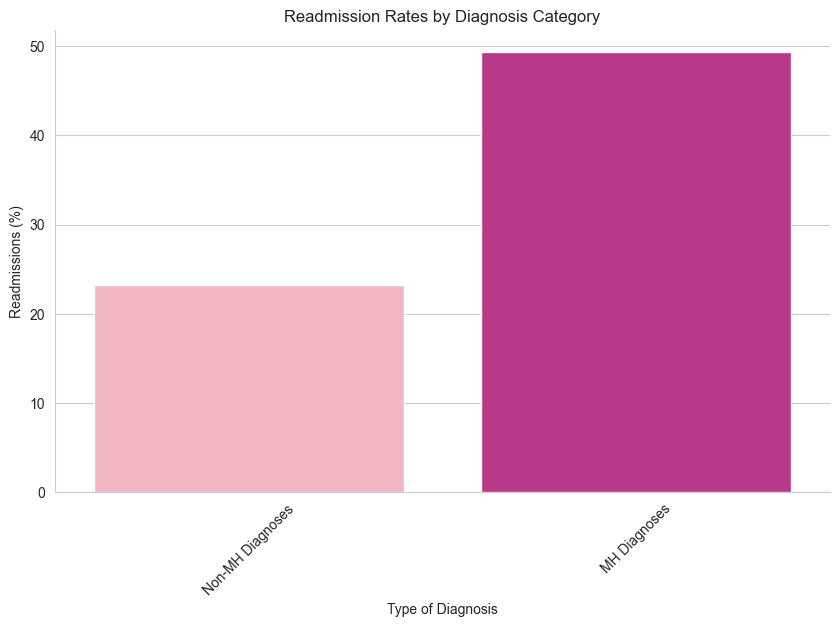

In [17]:
# Plot the average of the total number of readmissions per subject per category of death status
fig,ax = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(data=MH_disorders_vs_Non_MHM_Disorder,x='is_mh_disorder',y='percent_total_readmissions',palette='RdPu',ax=ax)
ax.set_xticks([0,1],["Non-MH Diagnoses", "MH Diagnoses"],rotation=45)
ax.set_xlabel("Type of Diagnosis")
ax.set_ylabel("Readmissions (%)")
ax.set_title("Readmission Rates by Diagnosis Category")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Approximately 49% of emergency department admissions for mental health issues were readmissions, compared to only about 23% for non-mental health-related admissions.

**Resarch Question:**
Are readmission rates among patients diagnosed with some mental health disorder significantly higher than those of patients not diagnosed with a mental health disorder?

**Where:**

- $\alpha$ = 0.05
- $p_1$: proportion of MH-Disorder patients readmitted
- $p_2$: proportion of Non-MH-Disorder patients readmitted

**Hypotheses:**

- $H_0$: $p_1$ ≤ $p_2$
- $H_1$: $p_1$ > $p_2$

In [6]:
from statsmodels.stats.proportion import proportions_ztest


num_readmitted_mh = MH_disorders_vs_Non_MHM_Disorder.iloc[1]['total_readmissions']
num_readmitted_non_mh = MH_disorders_vs_Non_MHM_Disorder.iloc[0]['total_readmissions']
total_admissions_mh = MH_disorders_vs_Non_MHM_Disorder.iloc[1]['total_num_visits']
total_admissions_non_mh = MH_disorders_vs_Non_MHM_Disorder.iloc[0]['total_num_visits']

successes = [num_readmitted_mh, num_readmitted_non_mh]
observations = [total_admissions_mh, total_admissions_non_mh]

# One-tailed test: H1: p1 > p2
stat, pval = proportions_ztest(count=successes, nobs=observations, alternative='larger')

In [7]:
print(f'z-statistic: {stat}, p-value: {pval}')

z-statistic: 193.6980317974423, p-value: 0.0


In [8]:
# Test of effect size for the magnitude of the significane level
from statsmodels.stats.proportion import proportion_effectsize

p1_MH = MH_disorders_vs_Non_MHM_Disorder.iloc[1]['percent_total_readmissions']/100
p2_Non_MH = MH_disorders_vs_Non_MHM_Disorder.iloc[0]['percent_total_readmissions']/100

effect_size = proportion_effectsize(p1_MH,p2_Non_MH)

print(f"Effect Size (Cohen's h): {effect_size:.4f}")

Effect Size (Cohen's h): 0.5530


Approximately 49% of emergency department admissions for mental health issues were readmissions, compared to only about 23% for non-mental health-related admissions. To test the significance of these results, a one-tailed proportion z-test indicated that patients diagnosed with a mental health disorder have significantly higher readmission rates compared to those diagnosed with a non-mental health-related disorder (z = 193.70, p = 0.0). The effect size was moderate (Cohen’s h = 0.55), suggesting that the observed difference is not only statistically significant but also practically meaningful in the healthcare context. This indicates that even a small reduction in readmission rates in patients diagnosed with a mental health disorder could have an impact on the overall readmission rate and have broader implications such reducing financial impact to the hospital and patient.

In [15]:
# Set a Clean white style for plots
sns.set_style("white")
# Set default palette color to red purple
sns.set_palette('RdPu')

## Age and Mental Health Diagnosis

In [9]:
# 1. What age group has the highest readmission rate?
group_with_highest_readmission = QUERY("""
    SELECT
      p.age_group,
      AVG(r.days_to_readmission) AS avg_num_of_days_to_readmission,
      SUM(r.had_readmission_within_30)AS total_num_of_readmissions,
      ROUND((SUM(r.had_readmission_within_30)/COUNT(*)) * 100,2) AS percent_of_readmissions
    FROM
      `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
    LEFT JOIN
      `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
    ON
      r.subject_id = p.subject_id
    LEFT JOIN
      `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
    ON
        r.stay_id = d.stay_id
    WHERE d.is_mh_disorder = 1
    GROUP BY p.age_group
    ORDER BY total_num_of_readmissions DESC
""")

In [10]:
group_with_highest_readmission = group_with_highest_readmission.sort_values(by='percent_of_readmissions',ascending=False)

/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_23084/2693279334.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


Text(0, 0.5, 'Proportion of Readmissions')

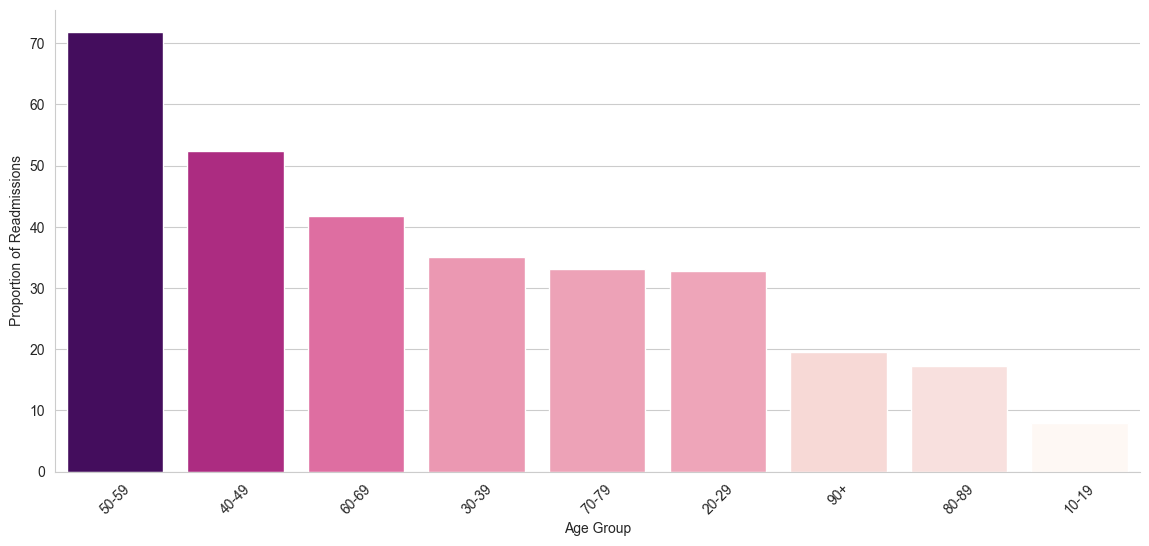

In [11]:
fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(14,6))
sns.barplot(x="age_group", y="percent_of_readmissions",estimator='mean',hue ="percent_of_readmissions",palette='RdPu',data=group_with_highest_readmission.dropna(),ax=ax1)
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.legend().set_visible(False)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Proportion of Readmissions")

The two highest age groups with the highest proportion of readmissions were those aged 50-59 and 40-59, with proportions of readmissions that were about 72% and 53%, respectively. These groups have significantly different proportions compared to other groups. I would have expected the data to demonstrate that the older you get the more readmissions you would have since older people are likely to have greater health complications overtime. However, it seems that the data here tells a mixed story. Mostly, older individuals have a greater proportion of readmissions except those 80 and up. Perhaps those 80 and up deal with different mental health issues that may not be as chronic or severe as those in there 40s - 70s.

In [11]:
#1.1 What are the readmission rates by age group and diagnosis?

age_groups_by_diagnosis = QUERY("""
SELECT
  p.age_group,
  d.mental_health_category,
  SUM(r.had_readmission_within_30) AS total_num_of_readmissions,
  ROUND((SUM(r.had_readmission_within_30)/COUNT(*)) * 100, 2) AS percent_of_readmissions
FROM
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
ON
  r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
ON
  r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY
  p.age_group, d.mental_health_category
HAVING
  total_num_of_readmissions > 1
ORDER BY
  percent_of_readmissions DESC
""")

In [12]:
age_groups_by_diagnosis = age_groups_by_diagnosis.pivot_table(index='age_group', columns='mental_health_category',values='percent_of_readmissions')

Text(0.5, 1.0, 'Percent of Readmissions by Age Group and Mental Health Diagnosis')

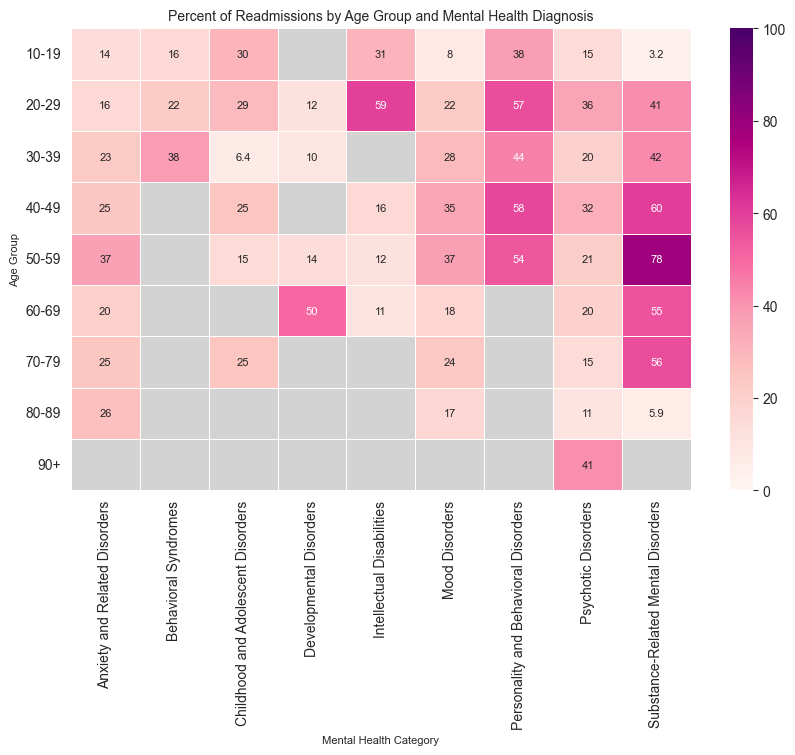

In [21]:
# Create a mask for NaN values
mask = age_groups_by_diagnosis.isnull()

# Create a custom colormap where NaNs appear gray
cmap = sns.color_palette("RdPu", as_cmap=True)
cmap.set_bad(color='lightgray')  # Set NaNs to light gray
fig,ax = plt.subplots(figsize=(10,6))
# Plot the heatmap
sns.heatmap(age_groups_by_diagnosis, mask=mask, cmap=cmap, linewidths=0.5,ax=ax,annot=True,annot_kws=({'size':8}),vmin=0,vmax=100)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('')
ax.set_ylabel('Age Group', fontsize=8)
ax.set_xlabel('Mental Health Category', fontsize=8)
ax.set_title("Percent of Readmissions by Age Group and Mental Health Diagnosis", fontsize=10)

Overall, substance‑related disorders and personality disorders show the highest readmission rates across all age groups, suggesting these patients may be at particularly elevated risk. Notably, individuals in their 50s with a substance‑related diagnosis have a 78% readmission rate—far exceeding any other age‑diagnosis combination.

**Age‑specific highlights:**

**20s**: Among patients in their 20s, those diagnosed with intellectual disabilities exhibit the highest readmission rate compared to other diagnostic categories in this cohort.

**50s**: As noted, substance‑related disorders peak in this decade at 78%, underscoring the vulnerability of middle‑aged patients with these conditions.

**60s**: In patients aged 60, developmental disorders carry the highest readmission rate (50%), indicating a distinct risk pattern in later life.

**90s+**: In patients 90 and older, psychotic disorders have the highest readmission rate (41%), demonstrating that there is a higher risk for these patients as they get much older

These patterns suggest targeted interventions—particularly for substance‑related, personality, intellectual disability, developmental, and psychotic disorders, populations—could help reduce ED bounce‑backs in the highest‑risk age groups. After reviewing this chart, it becomes clearer as to why those in their 80s and up much lower overall readmission rate compared to those in their 40s and 70s. Patients in their 80s and up, for the most part, tend to suffer from less severe mental health disorders. For example, Anxiety Related Disorders amongst all groups still have a lower readmission rate than the overall readmission rate and these patients only have 5.9% readmission rate for Substance Related Mental Health Disorders. While those in their 90s tend to suffer from Psychotic Disorders, this is the only mental ailment these individuals seem to suffer from still with a lower readmission rate than the overall readmission rate for those diagnosed with any mental health diagnosis. 

In [14]:
# 1.2 What age group on average has the highest number of comorbities per patient?
age_groups_by_comorbities = QUERY("""
SELECT
    age_group,
    ROUND(avg(num_comorbities),1) AS avg_num_comorbitites
FROM
    (SELECT
      p.age_group,
      p.subject_id,
      Count(icd_code) AS num_comorbities
      
    FROM
      `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
    LEFT JOIN
      `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
    ON
      r.subject_id = p.subject_id
    LEFT JOIN
      `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
    ON
      r.stay_id = d.stay_id
    WHERE d.seq_num > 1 AND d.is_mh_disorder = 1
    GROUP BY
      p.age_group,
      p.subject_id
        
    ORDER BY
      num_comorbities DESC) AS patient_counts
GROUP BY
  age_group
ORDER BY
  age_group;
  
""")

In [18]:
age_groups_by_comorbities

,age_group,avg_num_comorbitites
0,10-19,1.5
1,20-29,2.5
2,30-39,3.2
3,40-49,5.6
4,50-59,8.9
5,60-69,3.2
6,70-79,2.7
7,80-89,1.7
8,90+,1.3
9,Unknown,1.3


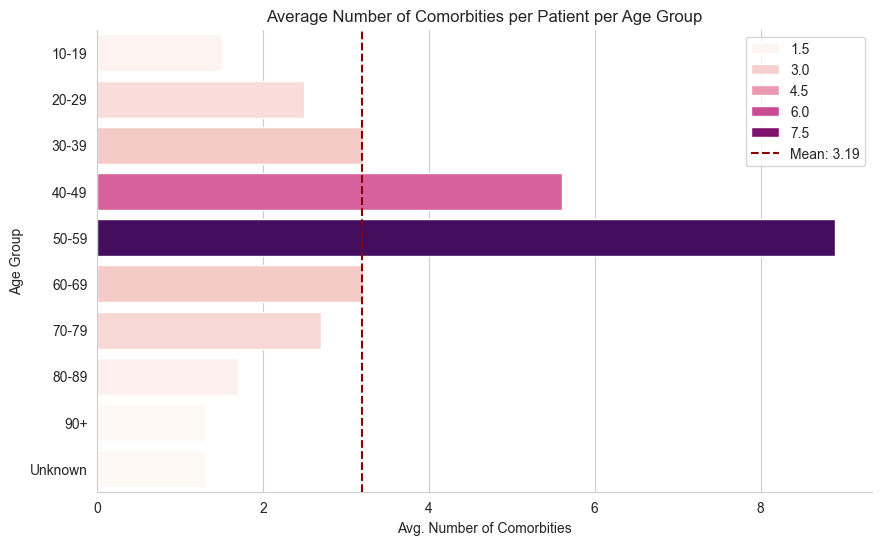

In [24]:
# plot a horizzontal bar chart of the number of comorbities by age_group
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=age_groups_by_comorbities, x="avg_num_comorbitites", y="age_group",orient='h',hue="avg_num_comorbitites",palette='RdPu',ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Age Group')
ax.set_xlabel('Avg. Number of Comorbities')
ax.set_title('Average Number of Comorbities per Patient per Age Group')
ax.legend()

# add a line to indicate the overall average of comorbitites per patient
com_mean_value = age_groups_by_comorbities['avg_num_comorbitites'].mean() # Get the overall mean of number of comorbities by age_group
ax.axvline(com_mean_value, color='darkred', linestyle='--', linewidth=1.5, label=f'Mean: {com_mean_value:.2f}')
ax.legend()

Patients between the ages of 40 - 59, have a higher amount of comorbities on average per patient compared to other age groups and that is well above the overall mean indicating that patients in these age groups may suffer from more complex diagnosis and require more targeted intervention. We have already found that individuals in these age groups have a high readmission rate for Substance Related Mental Health Disorders so it makes sense why they would have a high average comorbitiy. Substance Related Mental Health disorders are typically accompanied by other mental health disorders due to various changes to neural pathways, social changes, relationship changes, and more.

## Gender and Mental Health Diagnosis

In [37]:
# 1.What gender has the highest readmission rate? 
gender_by_admission = QUERY("""
SELECT
  gender,
  AVG(days_to_readmission) AS avg_readmissions,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions

FROM
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p

ON r.subject_id = p.subject_id

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
ON
  r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1



GROUP BY gender
ORDER BY total_readmissions DESC
""")
gender_by_admission

,gender,avg_readmissions,total_readmissions,percent_total_readmissions
0,M,14.167023,47480,59.12
1,F,14.530028,6131,23.76


Male patients have more readmissions compared to Women, 59.12% of male admissions to the emergency department are readmissions. The reason this is currently the case is still unclear but it might be due to the differences in the types of diagnosis male patients have versus female patients.

In [4]:
# 1. What are the top 10 diagnosis category by gender?
top_10_mh_cat_diagnosis_by_gender = QUERY("""
SELECT
  gender,
  mental_health_category,
  AVG(days_to_readmission) AS avg_readmissions,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions


FROM
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p

ON r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1


GROUP BY gender,mental_health_category
ORDER BY gender DESC, percent_total_readmissions DESC
""")

In [5]:
top_10_mh_cat_diagnosis_by_gender

,gender,mental_health_category,avg_readmissions,total_readmissions,percent_total_readmissions
0,M,Substance-Related Mental Disorders,14.115054,41759,66.75
1,M,Personality and Behavioral Disorders,14.341014,181,52.77
2,M,Mood Disorders,14.797210,3400,33.90
3,M,Psychotic Disorders,14.473930,1269,33.02
4,M,Intellectual Disabilities,18.112903,47,29.56
5,M,Anxiety and Related Disorders,13.243876,754,25.36
6,M,Childhood and Adolescent Disorders,14.512500,56,22.05
7,M,Behavioral Syndromes,20.571429,8,12.90
8,M,Developmental Disorders,12.571429,6,7.14
9,M,Unspecified Mental Disorders,NaN,0,0.00


Among male patients admitted to the emergency department for Substance-Related Mental Health Disorders and Personality and Behavioral Disorders, 67% and 53%, respectively, were readmitted for the same conditions. In contrast, among female patients admitted for these disorders, the pattern is reversed: 55% of those admitted for Personality and Behavioral Disorders were readmissions, compared to 29% for Substance-Related Mental Health Disorders. These two conditions represent the most common reasons for readmission to the emergency department in both male and female patients. So, this gives us more insight why more male patients have higher readmission rates compared to female patients. Substance Related Mental Disorders have the greatest risk for readmissions for Male patients and generally across age groups. 

In [13]:
# 2. What are the top 10 icd codes?
top_10_mh_icd_diagnosis_by_gender = QUERY("""
SELECT
  icd_title,
  AVG(days_to_readmission) AS avg_readmissions,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions


FROM
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p

ON r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1


GROUP BY icd_title
ORDER BY total_readmissions DESC,total_readmissions DESC
LIMIT 10
""")

In [14]:
top_10_mh_icd_diagnosis_by_gender

,icd_title,avg_readmissions,total_readmissions,percent_total_readmissions
0,"Alcohol abuse with intoxication, unspecified",14.145199,18407,69.68
1,ALCOHOL ABUSE-UNSPEC,13.781611,10700,58.06
2,"Alcohol dependence with intoxication, unspecified",14.405107,5475,78.19
3,AC ALCOHOL INTOX-UNSPEC,14.418636,3265,65.79
4,DEPRESSIVE DISORDER,15.768012,2210,30.30
...,...,...,...,...
435,ARTERIOSCLER DEPRESSIVE,NaN,0,0.00
436,OPIOID DEPENDENCE-REMISS,NaN,0,0.00
437,Cocaine abuse with cocaine-induced psychotic d...,NaN,0,0.00
438,SCHIZOPHRENIA NEC-UNSPEC,NaN,0,0.00


Diving further into the specific ICD codes within the mental health categories, an analysis of the top 10 mental health diagnoses—ranked by both the number and percentage of readmissions—reinforces our earlier findings. Substance-Related Disorders continue to account for a significant portion of readmissions, along with Personality and Behavioral Disorders, particularly Depressive Disorder and Major Depressive Disorder in this case.

## Race and Mental Health Diagnosis

In [21]:
#1. What are the readmission rates by racial group?
race_group_readmission_rates = QUERY("""
SELECT  
  race_group,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY race_group
ORDER BY percent_total_readmissions DESC
""")

In [22]:
race_group_readmission_rates

,race_group,total_readmissions,percent_total_readmissions
0,Black / African American,24892,69.49
1,Unknown / Declined / Unable to Obtain,1788,56.39
2,Hispanic / Latino,6097,53.57
3,American Indian / Alaska Native,157,44.35
4,Other,2294,38.32
5,White,18163,38.22
6,Native Hawaiian / Pacific Islander,27,25.00
7,Multiple Race / Ethnicity,11,11.34
8,Asian,182,10.95


/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_3681/1432691555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=race_group_readmission_rates, x="percent_total_readmissions", y="race_group",orient='h',palette='RdPu',ax=ax)
/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_3681/1432691555.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


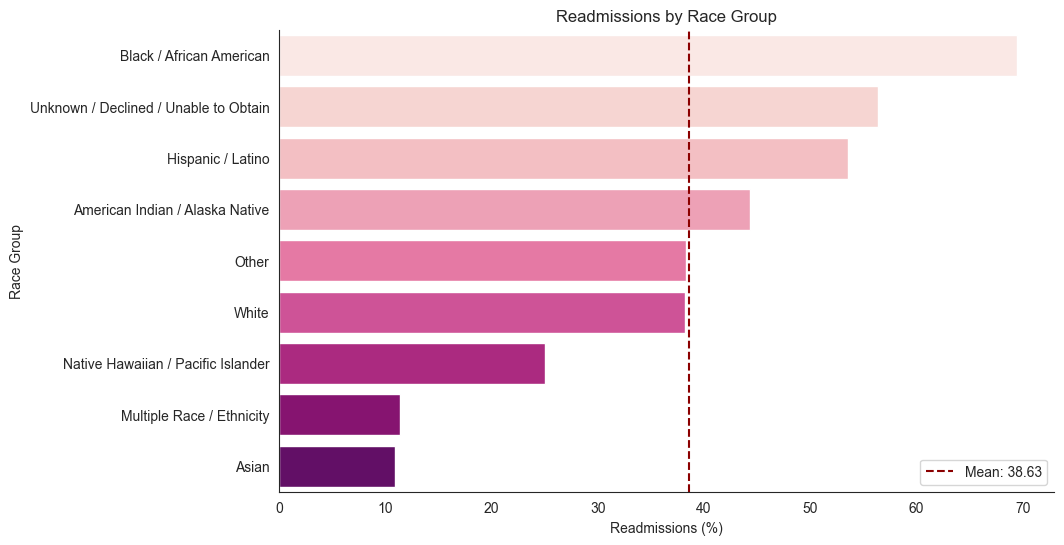

In [23]:
# plot a horizzontal bar chart of the readmission rates by race_group
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=race_group_readmission_rates, x="percent_total_readmissions", y="race_group",orient='h',palette='RdPu',ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Race Group')
ax.set_xlabel('Readmissions (%)')
ax.set_title('Readmissions by Race Group')
ax.legend()

# add a line to indicate the overall average percent of readmissions
com_mean_value = race_group_readmission_rates['percent_total_readmissions'].mean() # Get the overall mean of number of comorbities by age_group
ax.axvline(com_mean_value, color='darkred', linestyle='--', linewidth=1.5, label=f'Mean: {com_mean_value:.2f}')
ax.legend()

In [24]:
#2. What are the readmission rates by race?
race_readmission_rates = QUERY("""
SELECT  
  race,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY race
ORDER BY percent_total_readmissions DESC
""")

In [25]:
race_readmission_rates

,race,total_readmissions,percent_total_readmissions
0,BLACK/AFRICAN,5251,85.79
1,HISPANIC/LATINO - CUBAN,289,73.16
2,PORTUGUESE,332,69.17
3,BLACK/AFRICAN AMERICAN,19523,67.26
4,HISPANIC OR LATINO,2617,64.03
5,HISPANIC/LATINO - HONDURAN,430,61.43
6,UNKNOWN,1741,59.93
7,HISPANIC/LATINO - PUERTO RICAN,2845,56.88
8,AMERICAN INDIAN/ALASKA NATIVE,157,44.35
9,WHITE,17547,38.49


/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_3681/2066076962.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_race_readmission_rates, x="percent_total_readmissions", y="race",orient='h',palette='RdPu',ax=ax)
/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_3681/2066076962.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


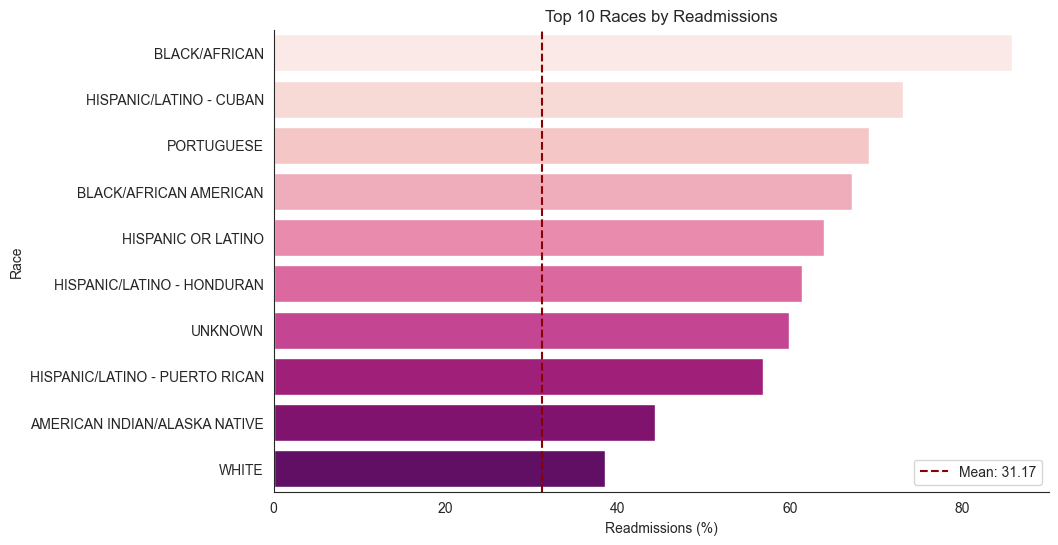

In [26]:
# plot a horizzontal bar chart of the readmission rates by race top 10 races
top_10_race_readmission_rates = race_readmission_rates[:10]
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=top_10_race_readmission_rates, x="percent_total_readmissions", y="race",orient='h',palette='RdPu',ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Race')
ax.set_xlabel('Readmissions (%)')
ax.set_title('Top 10 Races by Readmissions')
ax.legend()

# add a line to indicate the overall average percent of readmissions
com_mean_value = race_readmission_rates['percent_total_readmissions'].mean() # Get the overall mean of number of comorbities by age_group
ax.axvline(com_mean_value, color='darkred', linestyle='--', linewidth=1.5, label=f'Mean: {com_mean_value:.2f}')
ax.legend()

In [27]:
#2. What diagnoses are associated with higher readmission rates by race?
readmission_rates_by_race_and_mental_health_cat = QUERY("""
SELECT  
  race,
  mental_health_category,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1

GROUP BY race,mental_health_category
HAVING
    total_readmissions > 20
ORDER BY percent_total_readmissions DESC
""")

In [28]:
readmission_rates_by_race_and_mental_health_cat

,race,mental_health_category,total_readmissions,percent_total_readmissions
0,BLACK/AFRICAN,Substance-Related Mental Disorders,5172,90.85
1,PORTUGUESE,Substance-Related Mental Disorders,318,83.03
2,HISPANIC/LATINO - CUBAN,Substance-Related Mental Disorders,221,79.78
3,BLACK/AFRICAN AMERICAN,Substance-Related Mental Disorders,16762,76.56
4,HISPANIC OR LATINO,Substance-Related Mental Disorders,2386,70.51
5,HISPANIC/LATINO - PUERTO RICAN,Substance-Related Mental Disorders,2489,66.20
6,UNKNOWN,Substance-Related Mental Disorders,1629,65.45
7,HISPANIC/LATINO - HONDURAN,Substance-Related Mental Disorders,420,65.12
8,HISPANIC/LATINO - CUBAN,Mood Disorders,43,61.43
9,AMERICAN INDIAN/ALASKA NATIVE,Anxiety and Related Disorders,36,61.02


As seen throughout our analysis, Substance-Related Mental Health Disorders consistently emerge as a leading cause of emergency department readmissions—a trend that aligns with the chronic and relapsing nature of these conditions. From this analysis of the top 10 demographic groups, I identified those at greater risk of readmission when diagnosed with a Substance-Related Disorder, Mood Disorder, Anxiety and Related Disorder, or Personality and Behavioral Disorder. These groups include:

Black/African

Portuguese

Hispanic/Latino – Cuban

Black/African American

Hispanic or Latino

Hispanic/Latino – Puerto Rican

Unknown

Hispanic/Latino – Honduran

American Indian/Alaska Native

These disparities highlight the need for more targeted interventions and further investigation into potential underlying causes, such as cultural or socioeconomic barriers that may impact access to care and continuity of treatment. 

In [29]:
#1. Top 5 language groups by readmission rates
language_readmission_rates = QUERY("""
SELECT  
    language,
    SUM(had_readmission_within_30) AS total_readmissions,
    ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY language
ORDER BY percent_total_readmissions DESC
LIMIT 10
""")


/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_11628/3453059872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_languages, y='percent_total_readmissions', x='language', orient='v', palette='RdPu', ax=ax)


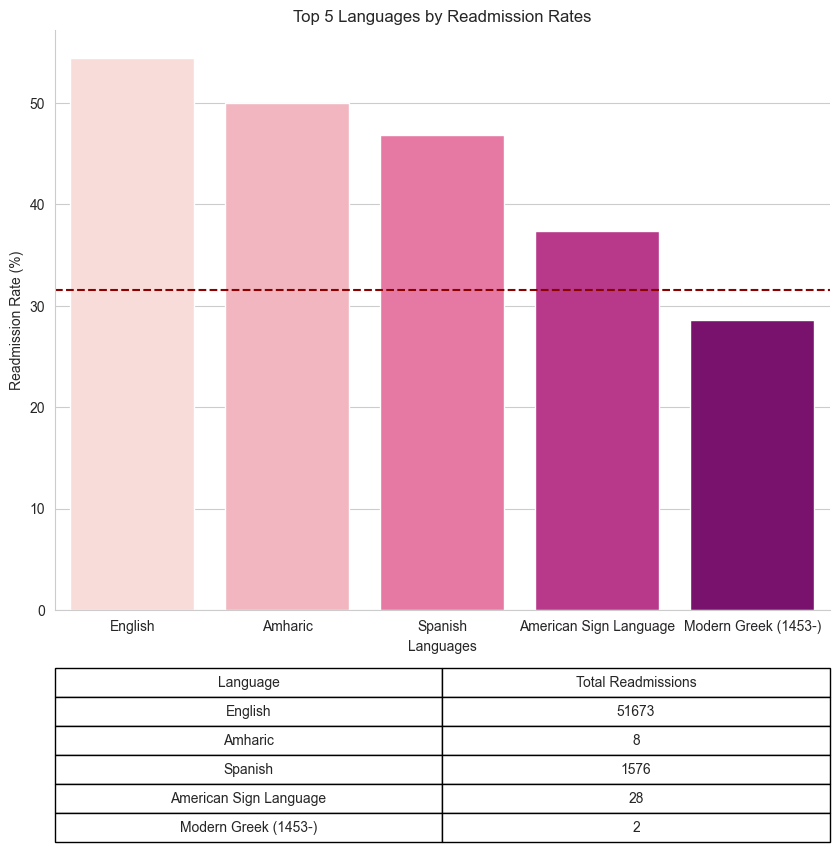

In [103]:
# Sort and take top 5 languages by readmission rates
top_languages = language_readmission_rates.sort_values(by='percent_total_readmissions', ascending=False).head(5)

fig, ax = plt.subplots(figsize=(10, 10))

# Bar plot
sns.barplot(data=top_languages, y='percent_total_readmissions', x='language', orient='v', palette='RdPu', ax=ax)

# Plot mean line
ax.axhline(y=language_readmission_rates['percent_total_readmissions'].mean(), color='darkred', linestyle='--')

# Titles and labels
ax.set_title('Top 5 Languages by Readmission Rates')
ax.set_ylabel('Readmission Rate (%)')
ax.set_xlabel('Languages')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add a table below the plot
# Format data for table
table_data = top_languages[['language', 'total_readmissions']].round(2).values

# Column labels
col_labels = ['Language', 'Total Readmissions']

# Create the table
table = plt.table(cellText=table_data,
                  colLabels=col_labels,
                  cellLoc='center',
                  loc='bottom',
                  bbox=[0.0, -0.4, 1, 0.3])  # [left, bottom, width, height]

# Adjust layout so table fits
plt.subplots_adjust(bottom=0.3)

plt.show()

Language barriers may contribute to higher hospital readmission rates and challenges in delivering adequate care to patients from diverse backgrounds. While English speakers show the highest number of readmissions, this may be partly due to the larger proportion of English-speaking patients overall. Notably, Spanish speakers—the second-largest language group in the U.S.—also face elevated readmission risks, which may help explain why individuals identifying as Latino exhibit higher overall readmission rates. Additionally, speakers of Amharic and users of American Sign Language experience readmission rates above the average across all language groups. These findings suggest that targeted interventions tailored to specific language communities are necessary to improve care and reduce disparities in readmission outcomes.

## Marital Status and Mental Health Diagnosis

In [35]:
#1. What are readmission rates by martial status? how do readmission rates differ?
readmission_rate_by_marital_status = QUERY("""
SELECT
  marital_status,
  -- Percentage of patients with this marital status who were readmitted
  SUM(had_readmission_within_30) * 100.0 / COUNT(*) AS percent_of_readmission,

  -- Bayes' Theorem: P(marital_status | readmitted
  ((
    (SUM(had_readmission_within_30) * 1.0 / COUNT(*)) * 28.1 -- 28.1 is P(Married)
  ) / (
    (SUM(had_readmission_within_30) * 1.0 / COUNT(*)) * 28.1 +
    (SUM(CASE WHEN had_readmission_within_30 = 0 THEN 1 ELSE 0 END) * 1.0 / COUNT(*)) * 71.9 -- 71.19 is P(-Married)
  )) * 100 AS bayes_p_marital_given_readmitted
  

FROM
  `patient_info.MH-ED-READMISSIONS` AS r
LEFT JOIN 
  `patient_info.MH-PATIENT-DEMO` AS p
ON
  r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY
  marital_status
ORDER BY percent_of_readmission DESC
""")

In [38]:
readmission_rate_by_marital_status[['marital_status', 'percent_of_readmission']]

,marital_status,percent_of_readmission
0,DIVORCED,56.152802
1,SINGLE,55.929855
2,WIDOWED,45.829870
3,MARRIED,26.679842
4,None,8.074183


All groups exhibit high rates of readmission, with the exception of patients who are married or categorized as "None", suggesting that individuals with partner support may be at lower risk of returning to the emergency department.

In [40]:
#1.1 What is the probability that someone is married given that they are readmitted?
readmission_rate_by_marital_status[['marital_status', 'bayes_p_marital_given_readmitted']].query("marital_status == 'MARRIED'")

,marital_status,bayes_p_marital_given_readmitted
3,MARRIED,12.450605


Using Bayes’ Theorem, I found that the probability of a patient being married given that they were readmitted is approximately 13%, further supporting the idea that married individuals are less likely to be readmitted. This reinforces the potential protective role of social support. As such, it may be beneficial to develop targeted interventions for patients with limited social support—particularly those who are unmarried or without a stable support system—to help reduce readmission rates.

Text(0.5, 0, 'Readmission Rate (%)')

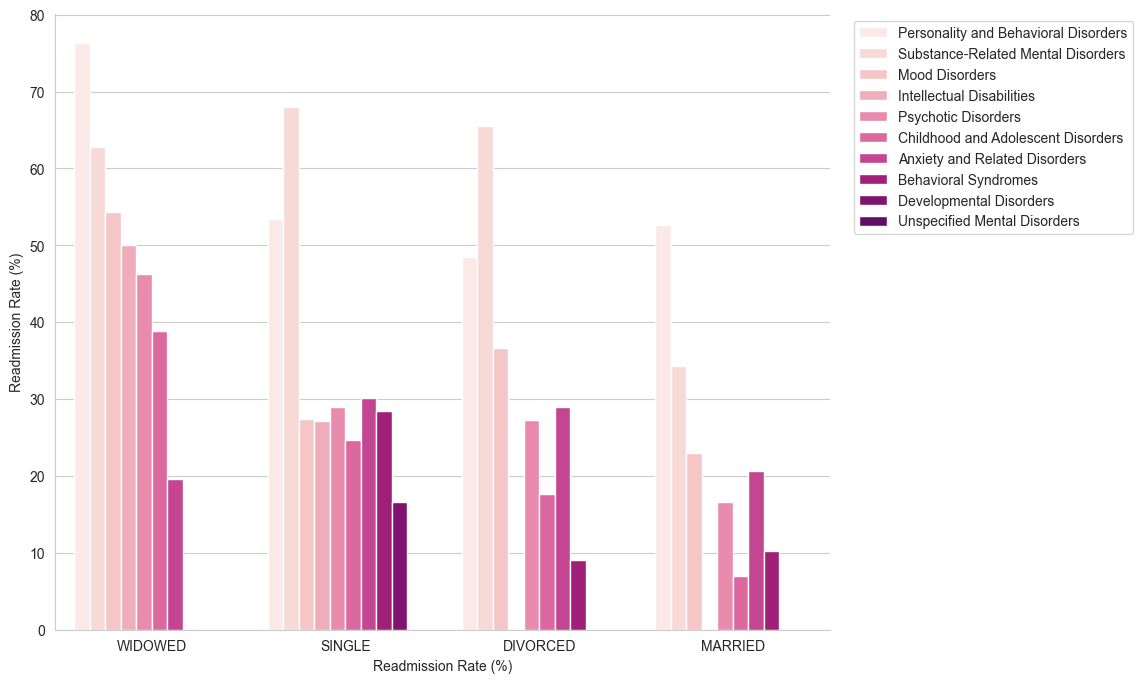

In [36]:
#2. What are readmission rates by martial status and mental health diagnosis category?
readmission_rate_by_marital_status_and_mh_cat = QUERY("""
SELECT
  marital_status,
  mental_health_category,
  -- Percentage of patients with this marital status who were readmitted
  SUM(had_readmission_within_30) * 100.0 / COUNT(*) AS percent_of_readmission
  

FROM
  `patient_info.MH-ED-READMISSIONS` AS r
LEFT JOIN 
  `patient_info.MH-PATIENT-DEMO` AS p
ON
  r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY
  marital_status,mental_health_category
ORDER BY percent_of_readmission DESC
""")

In [ ]:
readmission_rate_by_marital_status_and_mh_cat

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=readmission_rate_by_marital_status_and_mh_cat,x='marital_status',y='percent_of_readmission',hue='mental_health_category',palette='RdPu',ax=ax)
ax.legend(loc='upper right',bbox_to_anchor=(1.40, 1))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Readmission Rate (%)')
ax.set_xlabel('Readmission Rate (%)')

From this data, it is clear that married individuals are a less risk of readmission for any given disorder compared to all other groups that are essentially single/ not partnered. Suggesting that being partnered acts as a protective factor. Substance Abuse and Personality and Behaviour Disorders continue to have high readmission rates across groups. Notably, Widowed individuals have significantly higher rates of readmission for those diagnosed with some Personality and Behaviour Disorder. There is a None category under the marital status, patients that indicate this tend to have lower readmission rates like those that say they are married. So, it could be the case these patients indicate none because no option for partnered is presented.

Social support may play a **protective role**. Notably, **married individuals and those categorized as 'None'** for marital status have the **lowest readmission rates**.

Using **Bayes’ Theorem**,  the **probability of being married given readmission is only 13%**, reinforcing the idea that **social support systems may reduce the risk of ED return**.

This finding supports the implementation of **interventions that target socially isolated individuals** to improve mental health outcomes.


## Disposition and Readmission Rates

In [20]:
#1. What disposition is associated with higher readmission rates?
readmission_rate_by_disposition = QUERY("""
SELECT
  disposition,
  COUNT(*) AS total_visits,
  -- Percentage of patients with this marital status who were readmitted
  SUM(had_readmission_within_30) * 100.0 / COUNT(*) AS percent_of_readmission
FROM
  `patient_info.MH-ED-READMISSIONS` AS r
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY
  disposition
ORDER BY percent_of_readmission DESC
""")

In [21]:
readmission_rate_by_disposition

,disposition,total_visits,percent_of_readmission
0,ELOPED,4514,69.915817
1,LEFT AGAINST MEDICAL ADVICE,345,56.811594
2,LEFT WITHOUT BEING SEEN,545,52.477064
3,HOME,38542,38.132427
4,ADMITTED,9293,22.931239
5,TRANSFER,4719,18.711591
6,EXPIRED,11,18.181818
7,OTHER,159,10.062893


Patients who left the emergency department (ED) before being seen exhibited the highest readmission rates, ranging from 52% to 70%. This suggests that timely intervention is critical for reducing readmissions. The reasons behind patients leaving before receiving treatment may include long wait times or other factors. Further research is necessary to identify the underlying causes and develop strategies to improve patient retention in the ED, ultimately reducing the incidence of patients leaving without receiving the appropriate care.

## Arrival Transport and Readmission Rates

In [18]:
#1. What arrival transport is associated with higher readmission rates?
readmission_rate_by_arrival_transport = QUERY("""
SELECT
  arrival_transport,
  COUNT(*) AS total_visits,
  -- Percentage of patients with this marital status who were readmitted
  SUM(had_readmission_within_30) * 100.0 / COUNT(*) AS percent_of_readmission


FROM
  `patient_info.MH-ED-READMISSIONS` AS r
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1
GROUP BY
  arrival_transport
ORDER BY percent_of_readmission DESC
""")

In [19]:
readmission_rate_by_arrival_transport

,arrival_transport,total_visits,percent_of_readmission
0,UNKNOWN,2081,47.813551
1,AMBULANCE,34543,38.960137
2,WALK IN,21201,32.314513
3,OTHER,272,23.161765
4,HELICOPTER,31,0.000000


Patients classified as "Unknown" for their method of arrival in the ED (48%) had the highest readmission rates, followed closely by those arriving via ambulance (40%). Understanding the transportation methods used by patients in the "Unknown" category could provide valuable insights. Additionally, prioritizing ambulance arrivals, which typically indicate a need for immediate attention, may help improve patient outcomes and streamline care.

## Insurance and Readmission Rates

In [84]:
#1. What type of insurance is associated with higher rates of readmission?
insurance_readmission_rates = QUERY("""
SELECT  
  insurance,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id

LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d

ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1 
GROUP BY insurance
ORDER BY percent_total_readmissions DESC
""")

,insurance,total_readmissions,percent_total_readmissions
0,Other,3752,60.01
1,Medicaid,24529,56.61
2,No charge,97,54.49
3,Medicare,11230,53.99
4,None,7815,40.54
5,Private,6188,38.03


In [104]:
insurance_readmission_rates

Patients with private insurance or those classified as having 'None' insurance exhibited the lowest readmission rates, in contrast to other groups, which had rates ranging from the 50s to 60s. Insurance status could serve as a proxy for socioeconomic status, a factor not captured in the dataset but one that may offer additional insights into patient risk factors. Further analysis that incorporates socioeconomic variables could lead to a more comprehensive understanding of the determinants of readmission risk.

In [22]:
#1.1 Readmission rates by insurance provider and race with readmission rates greater than 50%?
insurance_and_race_readmission_rates = QUERY("""
SELECT  
  mental_health_category,
  insurance,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
ON r.stay_id = d.stay_id
WHERE d.is_mh_disorder = 1 AND mental_health_category = 'Substance-Related Mental Disorders'
GROUP BY mental_health_category,insurance
HAVING
    percent_total_readmissions > 40
ORDER BY percent_total_readmissions DESC

""")

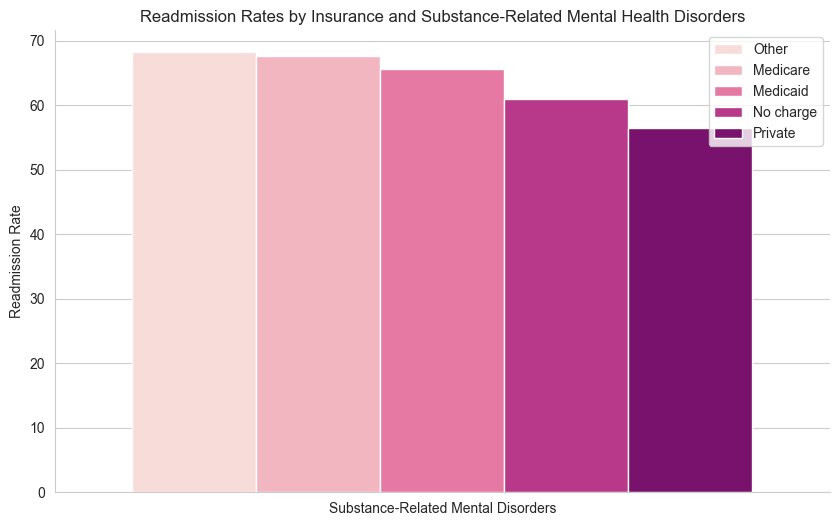

In [23]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=insurance_and_race_readmission_rates, x="mental_health_category", y="percent_total_readmissions",hue="insurance",palette='RdPu')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Readmission Rate')
ax.set_xlabel('')
ax.set_title('Readmission Rates by Insurance and Substance-Related Mental Health Disorders')
ax.legend()

Those with private insurance had the lowest readmission rate for individuals diagnosed with some substance related disorder. This may indicate that individuals with private insurance have greater access to resources and more wealth.

## Substance Related Mental Health Disorders and Medicaitions

In [ ]:
#1. Medications patients were taking and Substance Related Mental Health Disorders by readmission rate
readmission_rate_by_med_and_substance_disorder = QUERY("""
SELECT  
  CASE
    WHEN mental_health_category = "Substance-Related Mental Disorders" THEN 1
    ELSE 0
  END AS substance_related_disorder,
  m.name AS med_name,
  SUM(had_readmission_within_30) AS total_readmissions,
  ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
FROM 
  `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS` AS r
  
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
r.subject_id = p.subject_id
LEFT JOIN
  `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
ON r.stay_id = d.stay_id
LEFT JOIN 
    `physionet-data.mimiciv_ed.medrecon` AS m
ON  
    r.stay_id = m.stay_id
WHERE d.is_mh_disorder = 1

GROUP BY substance_related_disorder,med_name
HAVING
     percent_total_readmissions > 50 AND total_readmissions > 50
ORDER BY percent_total_readmissions DESC
""")

In [ ]:
readmission_rate_by_med_and_substance_disorder

While various medications are associated with higher admission rates and varying total readmission sizes, patients who were taking Chlordiazepoxide HCl, Omega-3, methenamine hippurate, Fosamprenavir prior to admission exhibited a 100% readmission rate. Although other factors may contribute to this outcome, the consistently high readmission rate for these medications warrants further investigation to better understand the underlying causes.

## Substance Abuse & Mortality

In [12]:
# 1. Is there an association between high readmission rates and patient mortality?
readmission_rates_and_mortality = QUERY("""

WITH readmissions AS (
    SELECT
        subject_id,
        COUNT(had_readmission_within_30) AS total_visits,
        SUM(had_readmission_within_30) AS total_readmissions,
        ROUND((SUM(had_readmission_within_30)/COUNT(*))*100,2) AS percent_total_readmissions
    FROM    
        `inbound-density-428819-p8.patient_info.MH-ED-READMISSIONS`
    GROUP BY
        subject_id
)

SELECT
    DISTINCT(r.subject_id),
    r.total_visits,
    r.total_readmissions,
    r.percent_total_readmissions,
    CASE
        WHEN dod IS NOT NULL THEN 1
        ELSE 0
    END AS expired
FROM 
    readmissions AS r 
LEFT JOIN
    `inbound-density-428819-p8.patient_info.MH-PATIENT-DEMO` AS p
ON
    r.subject_id = p.subject_id
INNER JOIN
    `inbound-density-428819-p8.patient_info.MH-ED-DIAGNOSIS` AS d
ON
    r.subject_id = d.subject_id
WHERE d.is_mh_disorder = 1
""")

/var/folders/dl/r49548rn2gzfpg1c87vrjnvw0000gn/T/ipykernel_23084/1423666236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=readmission_rates_and_mortality,x='expired',y='percent_total_readmissions',palette='RdPu',ax=ax)


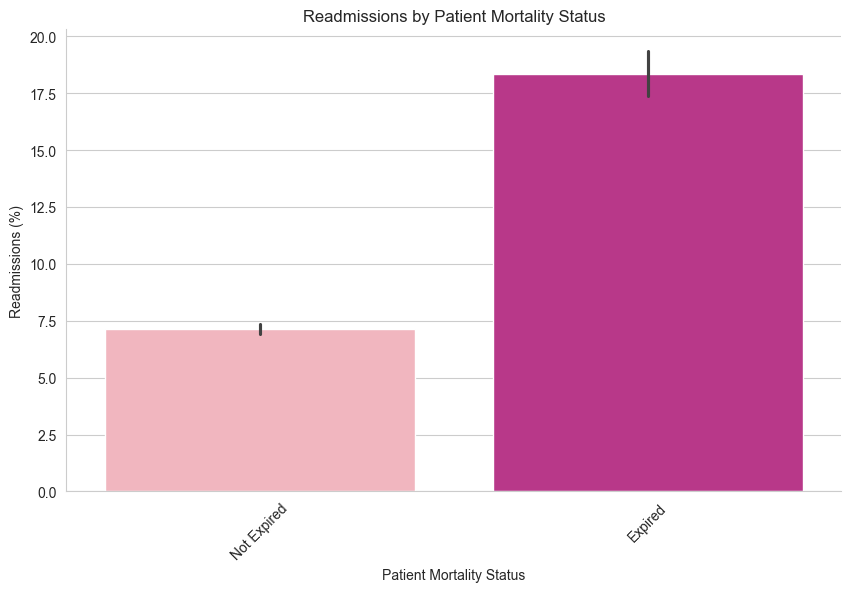

In [13]:
# Plot the percent of readmissions of death status
fig,ax = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(data=readmission_rates_and_mortality,x='expired',y='percent_total_readmissions',palette='RdPu',ax=ax)
ax.set_xticks([0,1],["Not Expired", "Expired"],rotation=45)
ax.set_xlabel("Patient Mortality Status")
ax.set_ylabel("Readmissions (%)")
ax.set_title("Readmissions by Patient Mortality Status")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

There appears to be an association between readmission rates and mortality: patients who died had a higher readmission rate (~18%) compared to those who survived (~7%). However, the confidence interval for the deceased group is much wider, indicating considerable variability. This suggests that some patients who died may have had many more readmission's than usual, and that the true average could be even higher, warranting further investigation into high-risk subgroups.



**Research Question:**

Do patients that have died have a higher readmission rate compared to those who have not died?

**Where**

$\alpha$: 0.05
p1 = proportion of readmissions among patients who have died
p2 = proportion of readmissions among patients that have not died

**Hypothesis**

$H_0$: $p_1$ $\neq$ $p_2$
$H_1$: $p_1$ > $p_2$

In [14]:
num_readmitted_expired = readmission_rates_and_mortality.iloc[1]['total_readmissions']
num_readmitted_not_expired = readmission_rates_and_mortality.iloc[0]['total_readmissions']
total_admissions_expired = readmission_rates_and_mortality.iloc[1]['total_visits']
total_admissions_non_expired = readmission_rates_and_mortality.iloc[0]['total_visits']

successes = [num_readmitted_expired, num_readmitted_not_expired]
observations = [total_admissions_expired, total_admissions_non_expired]

# One-tailed test: H1: p1 > p2
stat, pval = proportions_ztest(count=successes, nobs=observations, alternative='larger')
print(f'z-statistic: {stat}, p-value: {pval}')

z-statistic: 2.060378919112351, p-value: 0.019681165304425843


In [16]:
# Test of effect size for the magnitude of the significance level

p1_expired = readmission_rates_and_mortality.iloc[1]['percent_total_readmissions'] / 100
p2_non_expired = readmission_rates_and_mortality.iloc[0]['percent_total_readmissions'] / 100

effect_size = proportion_effectsize(p1_expired, p2_non_expired)

print(f"Effect Size (Cohen's h): {effect_size:.4f}")

Effect Size (Cohen's h): 0.9903


A one-tailed proportion z-test indicated that patients who died had significantly higher readmission rates compared to those who survived (z = 2.06, p = 0.019). The effect size was high (Cohen’s h = 0.99), suggesting that the difference is not only statistically significant but also potentially meaningful in a clinical context. These findings suggest an association between higher readmission rates and mortality. However, further research is necessary to understand the underlying causes of mortality and whether reducing readmissions could impact patient survival.

# Summary of Recommendations

1. Target High-Risk Mental Health Diagnoses
- Implement targeted discharge planning and follow-up care for patients with substance-related and behavioral disorders.
- Consider specialized care transfers or integrated behavioral health programs.

2. Demographic-Specific Support Programs
- Develop peer-support networks or community health outreach focused on unmarried or single men aged 40–59.
- Incorporate mental health check-ins as part of follow-up protocols for this demographic.

3. Address Racial Disparities
- Conduct further analysis to identify root causes of higher readmission rates among certain racial/ethnic groups.
- Develop tailored interventions to improve care engagement and outcomes.

4. Reduce Patients Leaving Without Treatment
- Investigate root causes of patients leaving the ED without being seen, such as long wait times, lack of communication, or unclear expectations.
- Ensure early patient engagment by having staff initiate contact immediately upon arrival, even if clinical care is delayed

5. Collect and Leverage Socioeconomic Data
- Begin tracking income, employment status, housing stability, and other social determinants of health.
- Use this data to design equity-focused interventions and improve access to care.

6. Investigate Readmission-Mortality Link
- Explore whether care coordination factors are contributing to increased mortality.
- Use findings to refine care transition protocols and prevent avoidable adverse outcomes.

## Next Steps: Predictive Modeling for Targeted Care

Given the consistent impact of **Substance-Related Mental Health Disorders and Personality/ Behavioural Disorders** on readmission across age, sex, and racial groups, the next step involves the development of a **machine learning model** to **predict individual risk of ED readmission** for these diagnoses.

Such a model could empower healthcare providers to:
- Identify high-risk patients at the point of discharge
- Prioritize care plans
- Tailor follow-up strategies
- Ultimately, **reduce avoidable readmissions** and improve patient outcomes